In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [16]:
data = pd.read_csv('C://Users//dsawa//Downloads//TSLA.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

In [17]:
closing_prices = data['Close'].values.reshape(-1, 1)

In [18]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(closing_prices)

In [19]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [20]:
sequence_length = 60

In [21]:
X, y = create_sequences(scaled_prices, sequence_length)

In [22]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [23]:
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [24]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
73/73 [==============================] - 9s 42ms/step - loss: 8.1838e-05
Epoch 2/100
73/73 [==============================] - 3s 42ms/step - loss: 4.6682e-06
Epoch 3/100
73/73 [==============================] - 3s 42ms/step - loss: 4.5299e-06
Epoch 4/100
73/73 [==============================] - 3s 39ms/step - loss: 4.3485e-06
Epoch 5/100
73/73 [==============================] - 3s 41ms/step - loss: 4.8649e-06
Epoch 6/100
73/73 [==============================] - 3s 43ms/step - loss: 4.1341e-06
Epoch 7/100
73/73 [==============================] - 3s 42ms/step - loss: 3.7157e-06
Epoch 8/100
73/73 [==============================] - 3s 44ms/step - loss: 3.7358e-06
Epoch 9/100
73/73 [==============================] - 3s 42ms/step - loss: 3.7248e-06
Epoch 10/100
73/73 [==============================] - 3s 43ms/step - loss: 3.3846e-06
Epoch 11/100
73/73 [==============================] - 3s 42ms/step - loss: 3.7145e-06
Epoch 12/100
73/73 [==============================] - 3s 42ms/s

In [25]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

19/19 [==============================] - 0s 15ms/step


In [26]:
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

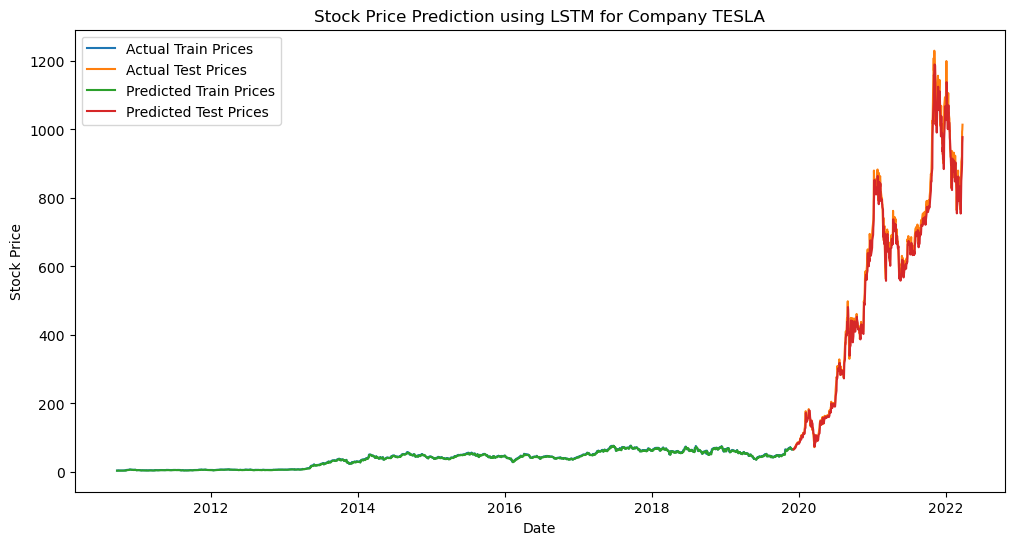

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(data.index[sequence_length:train_size+sequence_length], y_train, label='Actual Train Prices')
plt.plot(data.index[train_size+sequence_length:], y_test, label='Actual Test Prices')
plt.plot(data.index[sequence_length:train_size+sequence_length], train_predictions, label='Predicted Train Prices')
plt.plot(data.index[train_size+sequence_length:], test_predictions, label='Predicted Test Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using LSTM for Company TESLA')
plt.legend()
plt.show()